# Preprocesamiento de Datos

## 1. Importar librerías


In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carga del dataset Titanic
Ocupamos un dataset real desde para practicar con datos que contienen valores faltantes y distintas variables

In [30]:
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)


## 3. Análisis Exploratorio de Datos (EDA)
Inspeccionamos la estructura, tipos y estadísticas básicas del dataset.

In [31]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# Valores faltantes por cada columna
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 4. Limpieza de Datos
### 4.1 Conversión de tipos numéricos
Convertimos las columnas 'Age' y 'Fare' a tipo float.

In [36]:
df['Age'] = df['Age'].astype(float)
df['Fare'] = df['Fare'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 4.2 Eliminación de duplicados

In [37]:
print(f"Cantidad de filas antes del drop: {len(df)}")
df = df.drop_duplicates()
print(f"Cantidad de filas después del drop: {len(df)}")


Cantidad de filas antes del drop: 891
Cantidad de filas después del drop: 891


## 5. Imputación de Valores Faltantes
Usamos SimpleImputer para completar 'Age' con la mediana y 'Embarked' con la moda.

In [38]:
# Imputación numérica (Age)
imputer_num = SimpleImputer(strategy='median')
df[['Age']] = imputer_num.fit_transform(df[['Age']])

# Imputación categórica (Embarked)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = imputer_cat.fit_transform(df[['Embarked']])

df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## 6. Detección y Manejo de Outliers

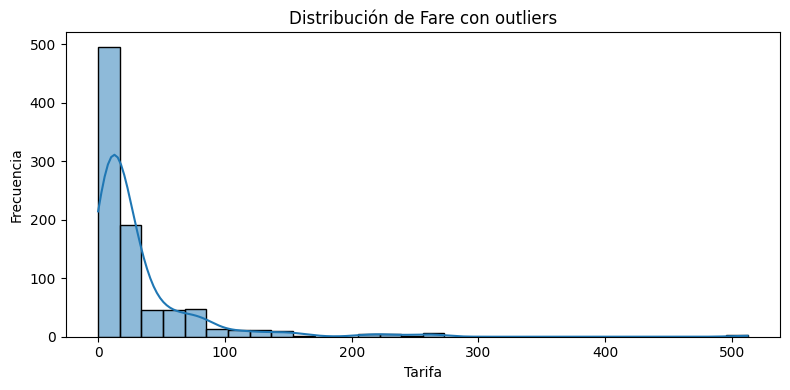

In [39]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Distribución de Fare con outliers')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [40]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
filtro = (df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))
df_sin_outliers = df.loc[filtro]
df_sin_outliers.shape, df.shape

((775, 12), (891, 12))

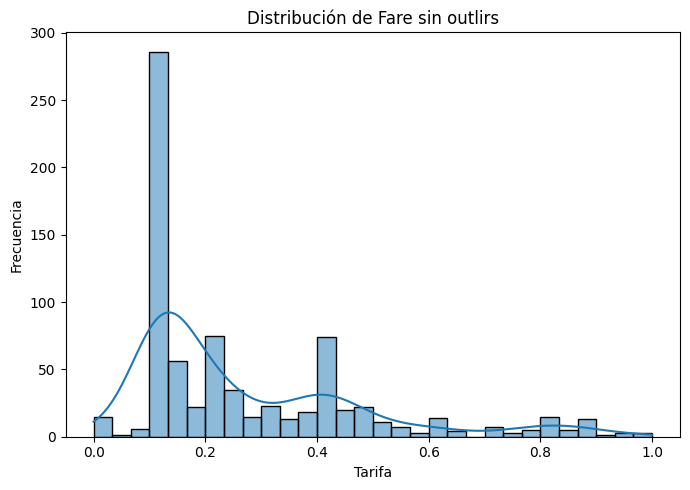

In [56]:
plt.figure(figsize=(7, 5))
sns.histplot(df_sin_outliers['Fare'], kde=True, bins=30)
plt.title('Distribución de Fare sin outlirs')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## 7. Codificación de Variables Categóricas
Convertimos 'Sex' y 'Embarked' a variables dummy mediante One-Hot Encoding.

In [42]:
df_sin_outliers.Embarked.value_counts()

,count
Embarked,
S,584
C,116
Q,75


In [43]:
df_encoded = pd.get_dummies(df_sin_outliers, columns=['Sex', 'Embarked'], drop_first=True)
df_encoded.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,NaN,True,True,False


## 8. Escalado y Normalización
### 8.1 Estandarización (StandardScaler)
Aplicamos StandardScaler para centrar en media 0 y desviación 1.

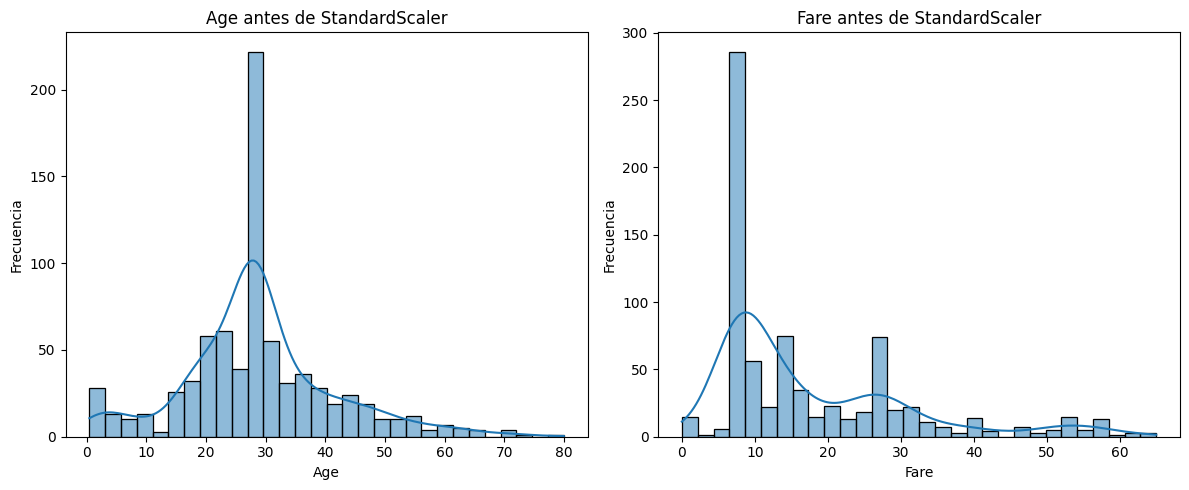

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_encoded['Age'], kde=True, bins=30)
plt.title('Age antes de StandardScaler')
plt.xlabel('Age')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_encoded['Fare'], kde=True, bins=30)
plt.title('Fare antes de StandardScaler')
plt.xlabel('Fare')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [26]:
scaler = StandardScaler()
columnas_num = ['Age', 'Fare']
df_encoded[columnas_num] = scaler.fit_transform(df_encoded[columnas_num])
df_encoded.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.528321,1,0,A/5 21171,-0.779117,NaN,True,False,True
2,3,1,3,"Heikkinen, Miss. Laina",-0.215182,0,0,STON/O2. 3101282,-0.729373,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.489381,1,0,113803,2.599828,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.489381,0,0,373450,-0.720161,NaN,True,False,True
5,6,0,3,"Moran, Mr. James",-0.058613,0,0,330877,-0.690071,NaN,True,True,False


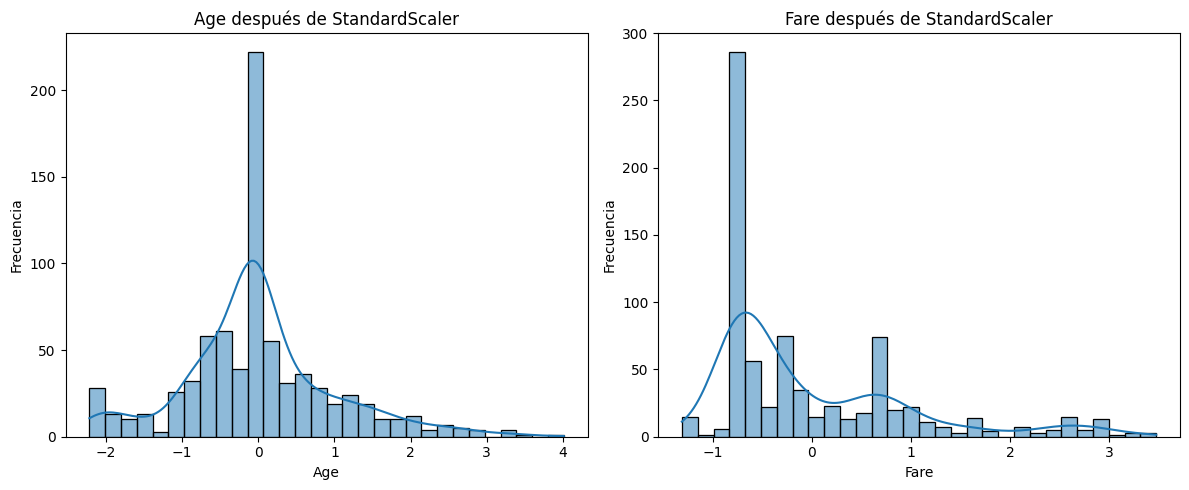

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_encoded['Age'], kde=True, bins=30)
plt.title('Age después de StandardScaler')
plt.xlabel('Age')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_encoded['Fare'], kde=True, bins=30)
plt.title('Fare después de StandardScaler')
plt.xlabel('Fare')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### 8.2 Normalización (MinMaxScaler)
Escalamos las mismas variables al rango [0,1].

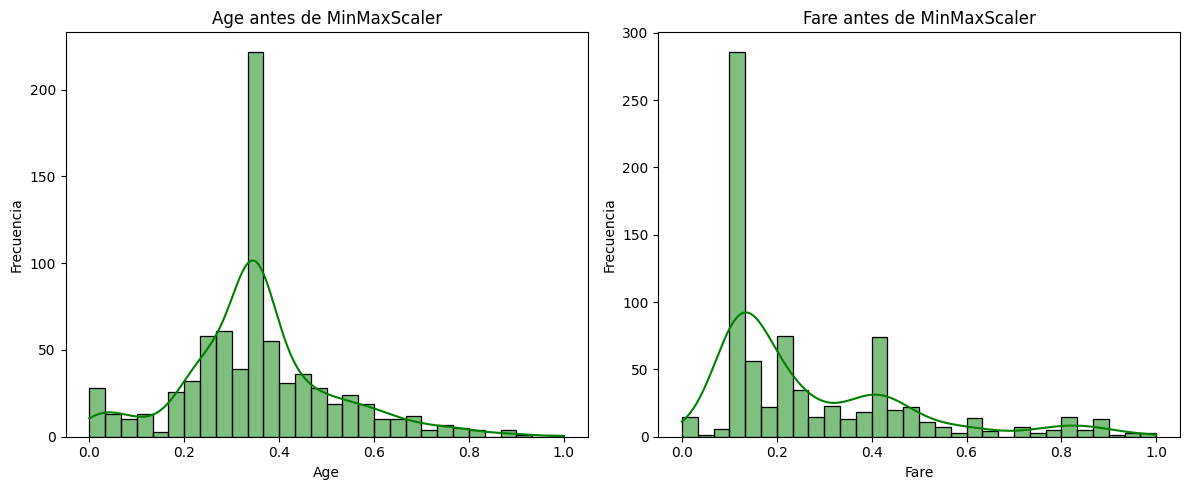

In [51]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_encoded['Age'], kde=True, bins=30, color="green")
plt.title('Age antes de MinMaxScaler')
plt.xlabel('Age')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_encoded['Fare'], kde=True, bins=30, color="green")
plt.title('Fare antes de MinMaxScaler')
plt.xlabel('Fare')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [52]:
mms = MinMaxScaler()
df_sin_outliers[columnas_num] = mms.fit_transform(df_sin_outliers[columnas_num])
df_sin_outliers.head()


/tmp/ipython-input-2670713646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers[columnas_num] = mms.fit_transform(df_sin_outliers[columnas_num])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.111538,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.121923,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.816923,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.123846,NaN,S
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.130128,NaN,Q


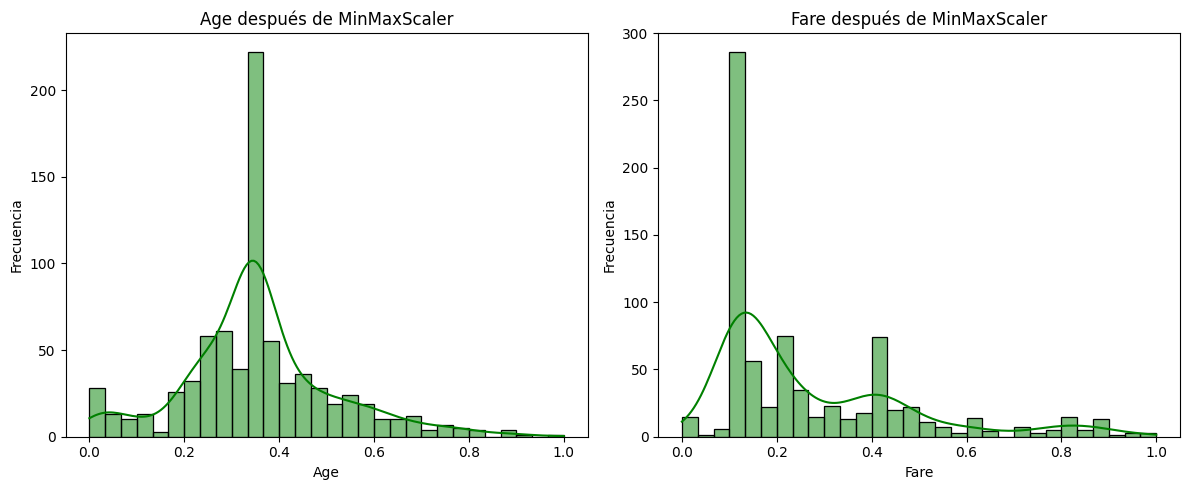

In [53]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_sin_outliers['Age'], kde=True, bins=30, color="green")
plt.title('Age después de MinMaxScaler')
plt.xlabel('Age')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_sin_outliers['Fare'], kde=True, bins=30, color="green")
plt.title('Fare después de MinMaxScaler')
plt.xlabel('Fare')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()